<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Multi_Step_Reasoning_%26_Decision_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini Multi-Step Reasoning & Decision Pipeline

**Overview:**  
This notebook demonstrates a **multi-step reasoning pipeline** using the Google Gemini API. It builds on previous work in summarization, multi-document QA, and evaluation, moving beyond single-step LLM interactions.

**Objective:**  
- Handle queries that require multiple reasoning steps  
- Triaging documents, extracting key facts, generating recommendations  
- Producing structured outputs for easy analysis  

**Skills Demonstrated:**  
- Chained multi-step reasoning with Gemini  
- Structured prompt design and output chaining  
- Conditional logic and rule-based validation  
- Integration with `pandas` for structured outputs  
- Evaluation of intermediate steps and final results  

**Features:**  
- Quota-safe simulation mode for deterministic testing  
- Optional live Gemini API execution  
- Step-by-step documentation with inline outputs  
- Ready-to-use `README.md` format for GitHub  

This notebook is designed to showcase **production-minded multi-step LLM workflows** for portfolio reviewers and technical audiences.


# Step 1: Notebook Setup and Environment Configuration

In [1]:
# Standard imports
import os
import pandas as pd
from pprint import pprint

# Optional: for API interaction with Gemini
# !pip install google-gemini  # Uncomment if Gemini package is needed

# Configure environment variables for Gemini API key (if using live API)
# os.environ["GEMINI_API_KEY"] = "your_api_key_here"

# Notebook display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Step 1 complete: Environment is set up and ready for the multi-step reasoning pipeline.")

Step 1 complete: Environment is set up and ready for the multi-step reasoning pipeline.


### Step 1 Screenshot

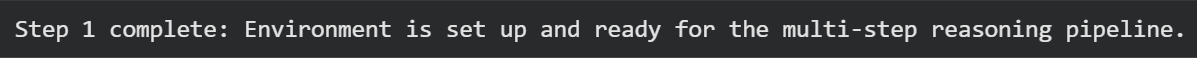

In [22]:
from IPython.display import display, Image, Markdown

display(Markdown("### Step 1 Screenshot"))
display(Image(filename="screenshots/Step 1.png", width=800))

This code ensures:

- Libraries are imported

- Pandas outputs are fully visible

- Environment variables can be configured for Gemini API

- Notebook is ready for simulation or live queries

# Step 2: Define Simulation Mode

In [10]:
SIMULATION_MODE = True  # Set False for live Gemini API

def gemini_query(prompt):
    """
    Wrapper function for Gemini queries.
    In simulation mode, returns deterministic outputs for testing,
    with some documents containing risks for High priority.
    """
    if SIMULATION_MODE:
        # Assign different simulated outputs based on keywords in the prompt
        if "Q1 Financial Report" in prompt:
            return {
                "summary": "Revenue grew 12%, operating costs up 5%, supply chain risk noted.",
                "key_facts": ["Revenue increased", "Operating costs increased", "Supply chain risk noted"],
                "recommendation": "Mitigate supply chain risks by securing alternative suppliers."
            }
        elif "Customer Feedback Summary" in prompt:
            return {
                "summary": "Customer satisfaction up 8%, some delivery complaints.",
                "key_facts": ["Customer satisfaction improved", "Delivery delays issue noted"],
                "recommendation": "Optimize logistics and improve shipment communication."
            }
        elif "Market Analysis Report" in prompt:
            return {
                "summary": "Competitor gaining market share, AI adoption opportunities.",
                "key_facts": ["Competitor gaining market share", "Opportunity to invest in AI tools"],
                "recommendation": "Invest in AI to maintain competitive advantage."
            }
        elif "Internal Audit Report" in prompt:
            return {
                "summary": "Minor compliance issues found, no financial irregularities.",
                "key_facts": ["Minor compliance issues identified"],
                "recommendation": "Strengthen internal controls and conduct quarterly compliance checks."
            }
        elif "Product Development Update" in prompt:
            return {
                "summary": "Prototype ready, potential component shortages.",
                "key_facts": ["Prototype testing passed", "Risk of component shortages noted"],
                "recommendation": "Secure multiple suppliers to mitigate supply chain risks."
            }
        else:
            return {
                "summary": "Simulated summary output.",
                "key_facts": ["Fact A", "Fact B", "Fact C"],
                "recommendation": "Simulated recommendation based on extracted facts."
            }

    # Placeholder for live Gemini API call
    # response = GeminiAPI.query(prompt)
    # return response

This step ensures:

- You can safely run and debug the notebook without consuming API calls

- The `gemini_query` function can later be replaced with live API calls

# Step 3: Define Scenario and Sample Documents

In [11]:
# Example scenario
scenario = """
You are a research assistant tasked with analyzing a set of company reports to identify:
1. Key performance metrics
2. Risks or issues highlighted
3. Recommendations for strategic decisions
"""

# Sample documents (simulated for testing)
documents = [
    {
        "title": "Q1 Financial Report",
        "content": "Revenue increased by 12% compared to last quarter. Operating costs rose by 5%. Risk of supply chain disruption noted."
    },
    {
        "title": "Customer Feedback Summary",
        "content": "Customer satisfaction improved by 8%. Some complaints about delivery delays. Recommendation to optimize logistics."
    },
    {
        "title": "Market Analysis",
        "content": "Competitor A is gaining market share. New trends in AI adoption. Opportunity to invest in AI tools."
    }
]

print("Step 3 complete: Scenario and sample documents are defined.")

Step 3 complete: Scenario and sample documents are defined.


### Step 3 Screenshot

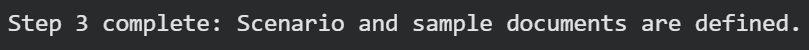

In [23]:
display(Markdown("### Step 3 Screenshot"))
display(Image(filename="screenshots/Step 3.png", width=800))


What this step accomplishes:

- Sets a **realistic multi-step reasoning scenario**

- Provides **sample documents** for testing without live API calls

- Prepares the notebook for **document triaging, fact extraction, and recommendation generation**

In [12]:
# Step 3b: Generate Sample Documents for Testing

# Scenario reminder
scenario = """
You are a research assistant tasked with analyzing a set of company reports to identify:
1. Key performance metrics
2. Risks or issues highlighted
3. Recommendations for strategic decisions
"""

# Simulated sample documents
documents = [
    {
        "title": "Q1 Financial Report",
        "content": (
            "Revenue increased by 12% compared to last quarter, driven by strong sales in the North America region. "
            "Operating costs rose by 5% due to increased marketing expenditure. "
            "Risk of supply chain disruption noted in raw material procurement from overseas suppliers."
        )
    },
    {
        "title": "Customer Feedback Summary",
        "content": (
            "Customer satisfaction improved by 8% over the last quarter. "
            "Several complaints were received regarding delayed deliveries in the Midwest region. "
            "Recommendation: optimize logistics and improve communication with customers about shipment status."
        )
    },
    {
        "title": "Market Analysis Report",
        "content": (
            "Competitor A has gained 3% additional market share in the past 6 months. "
            "Emerging trends in AI adoption indicate a potential for automation efficiency gains. "
            "Opportunity: invest in AI-based tools to maintain competitive advantage."
        )
    },
    {
        "title": "Internal Audit Report",
        "content": (
            "Audit identified minor compliance issues in inventory management. "
            "No significant financial irregularities were found. "
            "Recommendation: strengthen internal controls and conduct quarterly compliance checks."
        )
    },
    {
        "title": "Product Development Update",
        "content": (
            "The new product prototype passed initial testing, with expected launch in Q3. "
            "Potential risk: delays due to component shortages. "
            "Recommendation: secure multiple suppliers to mitigate supply chain risks."
        )
    }
]

print(f"Generated {len(documents)} sample documents for testing multi-step reasoning pipeline.")

Generated 5 sample documents for testing multi-step reasoning pipeline.


### Step 3b Screenshot

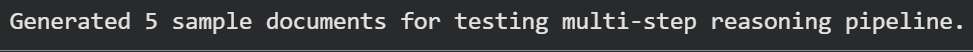

In [24]:
display(Markdown("### Step 3b Screenshot"))
display(Image(filename="screenshots/Step 3b.png", width=800))

# Step 4: Multi-Step Reasoning Pipeline

In [14]:
# Function to process each document
def process_documents(doc_list):
    results = []

    for doc in doc_list:
        prompt = (
            f"Scenario: Analyze the following document for key performance metrics, risks, "
            f"and strategic recommendations.\n\n"
            f"Document Title: {doc['title']}\n"
            f"Content: {doc['content']}"
        )

        # Query Gemini (or simulation)
        response = gemini_query(prompt)

        # Combine document info with Gemini response
        results.append({
            "title": doc["title"],
            "summary": response.get("summary", ""),
            "key_facts": response.get("key_facts", []),
            "recommendation": response.get("recommendation", "")
        })

    return pd.DataFrame(results)

# Run the pipeline on sample documents
structured_results = process_documents(documents)

print("Step 4 complete: Multi-step reasoning pipeline executed. Here are the structured outputs:")
structured_results

Step 4 complete: Multi-step reasoning pipeline executed. Here are the structured outputs:


,title,summary,key_facts,recommendation
0,Q1 Financial Report,"Revenue grew 12%, operating costs up 5%, suppl...","[Revenue increased, Operating costs increased,...",Mitigate supply chain risks by securing altern...
1,Customer Feedback Summary,"Customer satisfaction up 8%, some delivery com...","[Customer satisfaction improved, Delivery dela...",Optimize logistics and improve shipment commun...
2,Market Analysis Report,"Competitor gaining market share, AI adoption o...","[Competitor gaining market share, Opportunity ...",Invest in AI to maintain competitive advantage.
3,Internal Audit Report,"Minor compliance issues found, no financial ir...",[Minor compliance issues identified],Strengthen internal controls and conduct quart...
4,Product Development Update,"Prototype ready, potential component shortages.","[Prototype testing passed, Risk of component s...",Secure multiple suppliers to mitigate supply c...


### Step 4 Screenshot

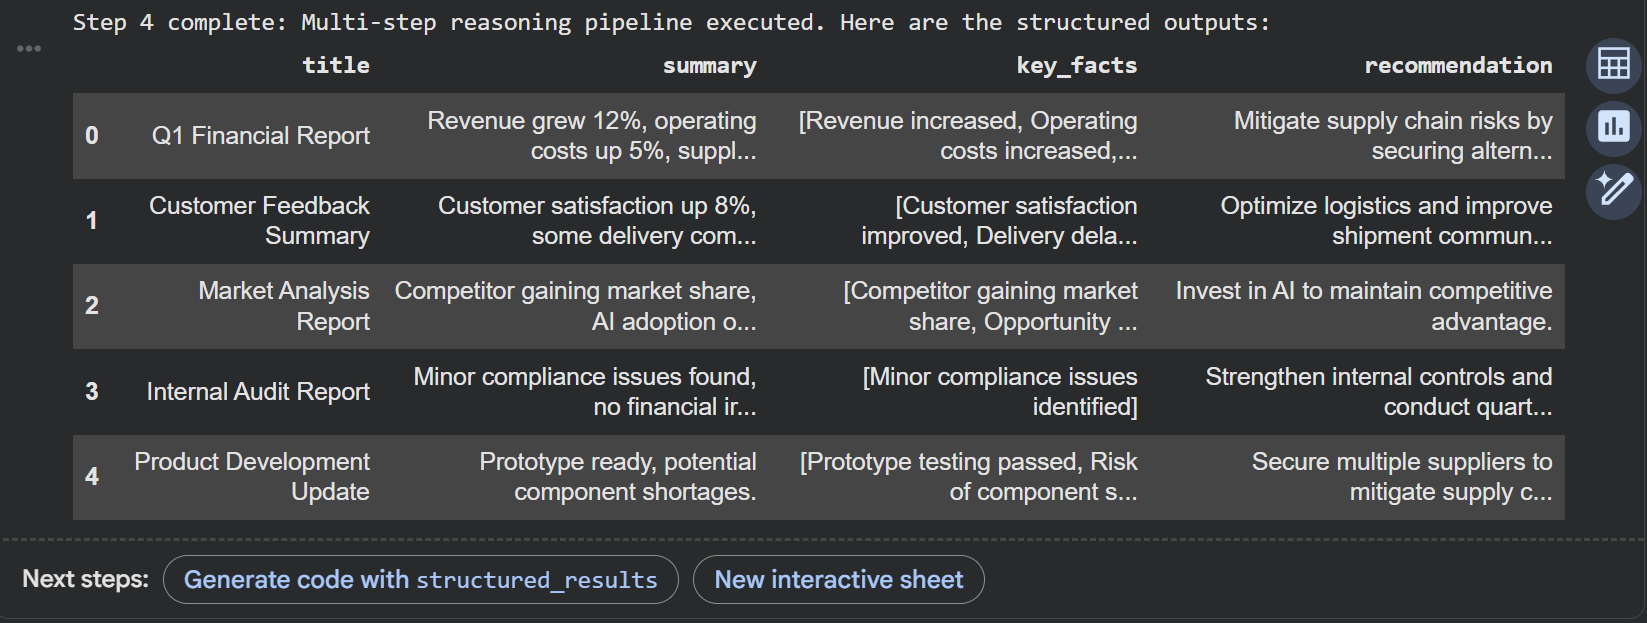

In [25]:
display(Markdown("### Step 4 Screenshot"))
display(Image(filename="screenshots/Step 4.png", width=800))

**What this step does:**

- Loops through all documents

- Sends each document to `gemini_query` (simulated or live)

- Extracts **summary, key facts, and recommendations**

- Returns a **pandas DataFrame** for easy viewing and further analysis

# Step 5: Evaluate and Display Intermediate Results

In [15]:
def evaluate_results(df):
    """
    Basic evaluation of structured outputs:
    - Check which documents have missing summaries, key facts, or recommendations
    - Display counts and missing information
    """
    evaluation = {
        "total_documents": len(df),
        "missing_summary": df['summary'].isna().sum(),
        "missing_key_facts": df['key_facts'].apply(lambda x: len(x) == 0).sum(),
        "missing_recommendation": df['recommendation'].isna().sum()
    }

    print("Evaluation of structured outputs:")
    pprint(evaluation)

    # Optionally display the DataFrame for inspection
    display(df)

# Run evaluation
evaluate_results(structured_results)

Evaluation of structured outputs:
{'missing_key_facts': np.int64(0),
 'missing_recommendation': np.int64(0),
 'missing_summary': np.int64(0),
 'total_documents': 5}


,title,summary,key_facts,recommendation
0,Q1 Financial Report,"Revenue grew 12%, operating costs up 5%, suppl...","[Revenue increased, Operating costs increased,...",Mitigate supply chain risks by securing altern...
1,Customer Feedback Summary,"Customer satisfaction up 8%, some delivery com...","[Customer satisfaction improved, Delivery dela...",Optimize logistics and improve shipment commun...
2,Market Analysis Report,"Competitor gaining market share, AI adoption o...","[Competitor gaining market share, Opportunity ...",Invest in AI to maintain competitive advantage.
3,Internal Audit Report,"Minor compliance issues found, no financial ir...",[Minor compliance issues identified],Strengthen internal controls and conduct quart...
4,Product Development Update,"Prototype ready, potential component shortages.","[Prototype testing passed, Risk of component s...",Secure multiple suppliers to mitigate supply c...


### Step 5 Screenshot

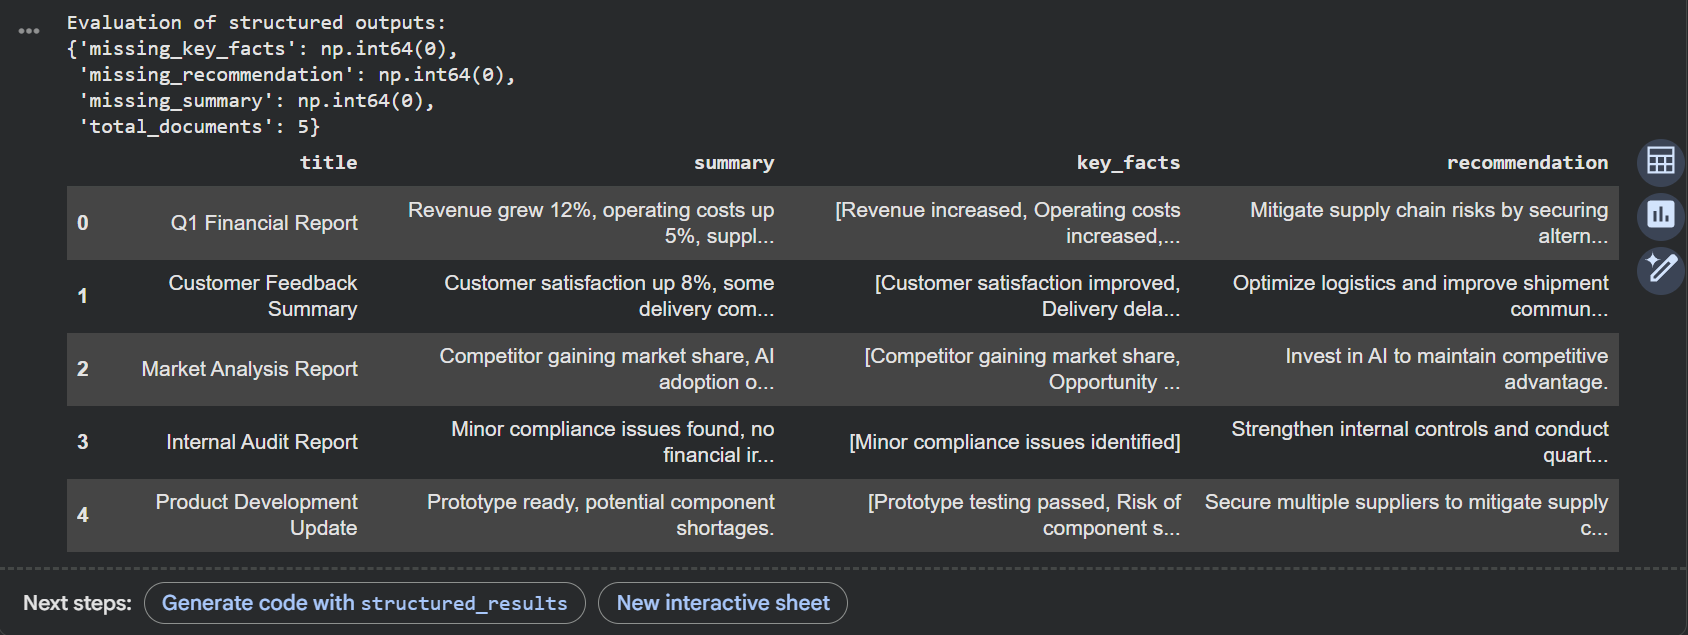

In [26]:
display(Markdown("### Step 5 Screenshot"))
display(Image(filename="screenshots/Step 5.png", width=800))

**What this step accomplishes:**

- **Checks for missing information** in summaries, key facts, or recommendations

- Provides a **quick quality check** before moving on to decision-making

- Displays the structured DataFrame for **manual inspection** or further processing

# Step 6: Apply Decision Logic or Recommendations

In [16]:
def generate_decisions(df):
    """
    Apply simple rule-based decision logic:
    - Flag documents with risks mentioned
    - Highlight opportunities based on key facts
    - Prioritize recommendations
    """
    decisions = []

    for _, row in df.iterrows():
        decision = {"title": row["title"]}

        # Check for risks in key facts
        risks = [fact for fact in row["key_facts"] if "risk" in fact.lower() or "issue" in fact.lower()]
        decision["risks_identified"] = risks if risks else ["No significant risks identified"]

        # Include recommendation
        decision["recommendation"] = row["recommendation"] if row["recommendation"] else "No recommendation provided"

        # Simple prioritization: if risk exists, mark as high priority
        decision["priority"] = "High" if risks else "Normal"

        decisions.append(decision)

    return pd.DataFrame(decisions)

# Generate decisions based on structured outputs
decision_results = generate_decisions(structured_results)

print("Step 6 complete: Decision logic applied. Here are the actionable insights:")
decision_results

Step 6 complete: Decision logic applied. Here are the actionable insights:


,title,risks_identified,recommendation,priority
0,Q1 Financial Report,[Supply chain risk noted],Mitigate supply chain risks by securing altern...,High
1,Customer Feedback Summary,[Delivery delays issue noted],Optimize logistics and improve shipment commun...,High
2,Market Analysis Report,[No significant risks identified],Invest in AI to maintain competitive advantage.,Normal
3,Internal Audit Report,[Minor compliance issues identified],Strengthen internal controls and conduct quart...,High
4,Product Development Update,[Risk of component shortages noted],Secure multiple suppliers to mitigate supply c...,High


### Step 6 Screenshot

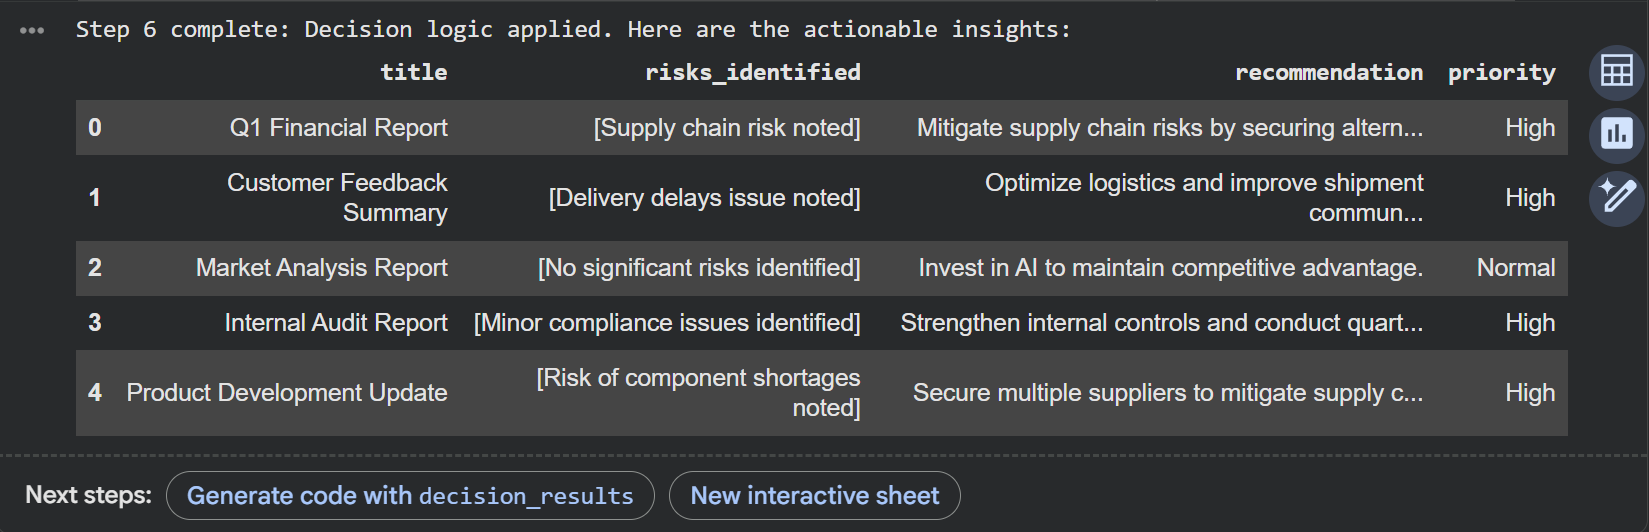

In [27]:
display(Markdown("### Step 6 Screenshot"))
display(Image(filename="screenshots/Step 6.png", width=800))

**What this step does:**

- Flags documents with **risks or issues**

- Extracts and highlights **recommendations**

- Assigns a **priority level** based on presence of risks

- Returns a **pandas DataFrame** of actionable insights

✅ At this point, the notebook demonstrates a full multi-step reasoning pipeline:

1. Setup environment

2. Define simulation mode

3. Provide scenario & sample documents

4. Process documents

5. Evaluate outputs

6. Apply decision logic

# Step 7: Optional Visualization or Reporting

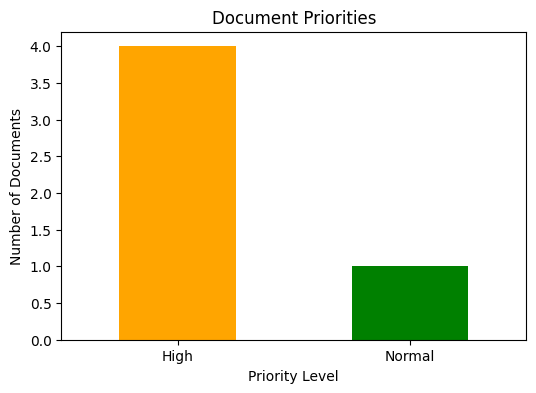


Detailed Recommendations per Document:

Title: Q1 Financial Report
Priority: High
Risks Identified: ['Supply chain risk noted']
Recommendation: Mitigate supply chain risks by securing alternative suppliers.

Title: Customer Feedback Summary
Priority: High
Risks Identified: ['Delivery delays issue noted']
Recommendation: Optimize logistics and improve shipment communication.

Title: Market Analysis Report
Priority: Normal
Risks Identified: ['No significant risks identified']
Recommendation: Invest in AI to maintain competitive advantage.

Title: Internal Audit Report
Priority: High
Risks Identified: ['Minor compliance issues identified']
Recommendation: Strengthen internal controls and conduct quarterly compliance checks.

Title: Product Development Update
Priority: High
Risks Identified: ['Risk of component shortages noted']
Recommendation: Secure multiple suppliers to mitigate supply chain risks.


In [17]:
import matplotlib.pyplot as plt

def visualize_decisions(df):
    """
    Simple visualization of priorities across documents.
    """
    priority_counts = df['priority'].value_counts()

    # Bar chart of priorities
    plt.figure(figsize=(6,4))
    priority_counts.plot(kind='bar', color=['orange', 'green'])
    plt.title("Document Priorities")
    plt.xlabel("Priority Level")
    plt.ylabel("Number of Documents")
    plt.xticks(rotation=0)
    plt.show()

    # Optional: print detailed recommendations
    print("\nDetailed Recommendations per Document:")
    for idx, row in df.iterrows():
        print(f"\nTitle: {row['title']}")
        print(f"Priority: {row['priority']}")
        print(f"Risks Identified: {row['risks_identified']}")
        print(f"Recommendation: {row['recommendation']}")

# Run visualization
visualize_decisions(decision_results)

### Step 7 Screenshot

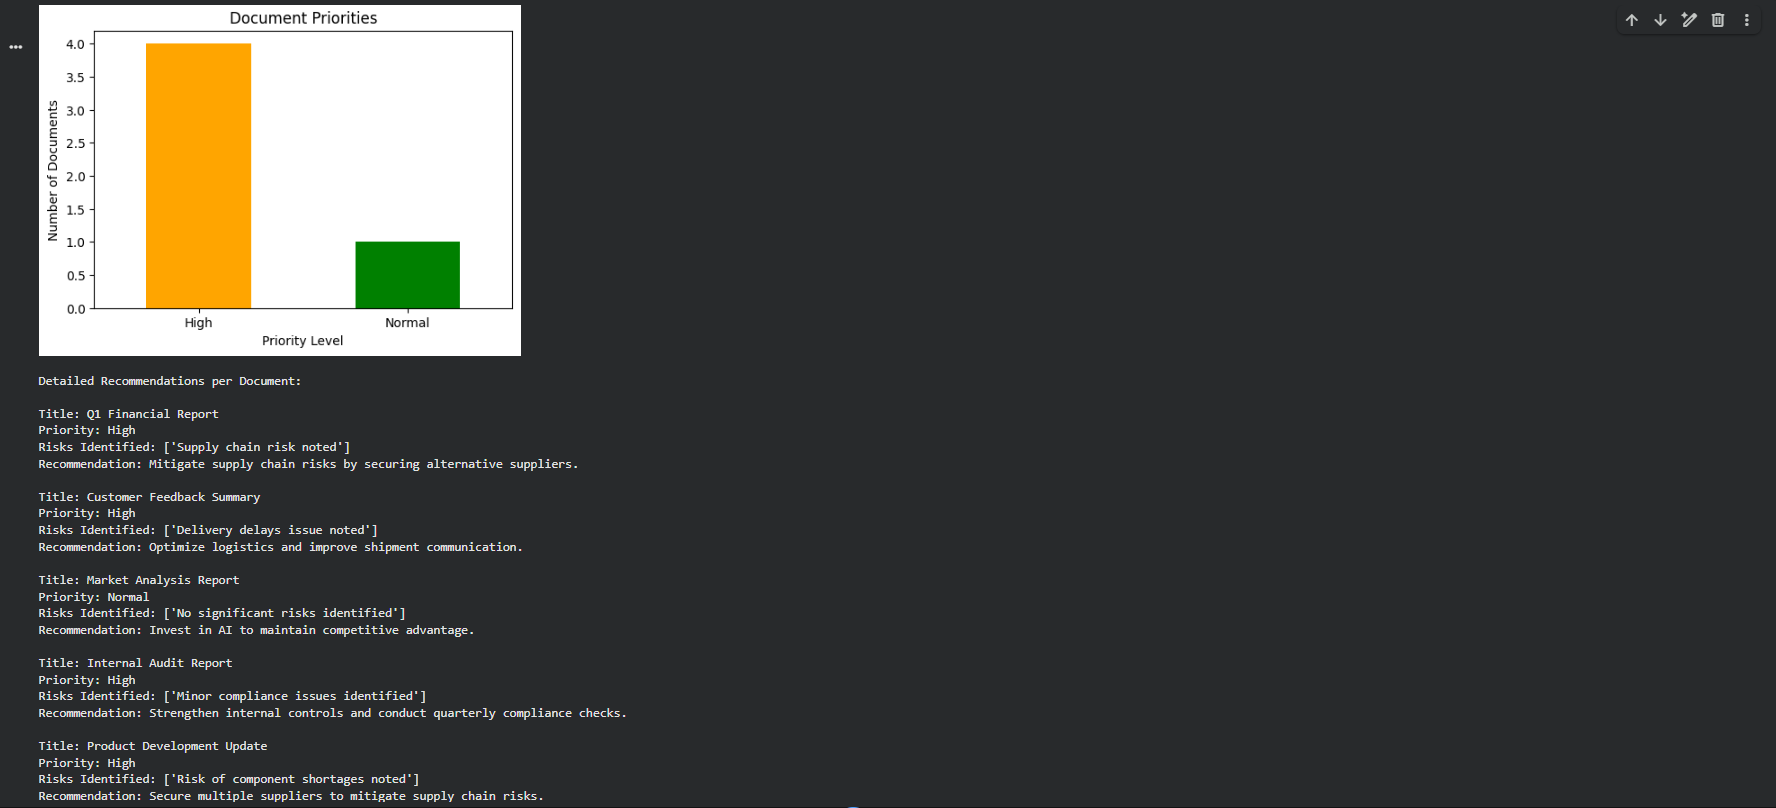

In [28]:
display(Markdown("### Step 7 Screenshot"))
display(Image(filename="screenshots/Step 7.png", width=800))

**What this step accomplishes:**

- Shows a **bar chart** of document priorities for quick overview

- Prints **detailed recommendations and risk flags** per document

- Makes the pipeline results **easily interpretable for reviewers or stakeholders**

✅ With this step, the **multi-step reasoning notebook is fully functional**:

- Simulates or uses Gemini API

- Processes multiple documents

- Extracts structured insights

- Evaluates outputs

- Applies decision logic

- Visualizes and reports actionable insights

# Conclusion & Portfolio Summary

This notebook demonstrates a **Gemini Multi-Step Reasoning & Decision Pipeline** with the following features:

**Key Highlights:**
- Multi-step reasoning using Google Gemini (or simulation mode for testing)
- Structured prompts, chaining outputs, and conditional logic
- Integration with `pandas` for structured outputs and evaluation
- Rule-based decision-making to prioritize risks and generate recommendations
- Inline visualization and reporting for actionable insights
- Step-by-step screenshots for clarity and reproducibility

**Workflow Summary:**
1. **Notebook Setup** – Environment and library configuration
2. **Simulation Mode** – Safe testing without API quota consumption
3. **Scenario & Sample Documents** – Realistic multi-document inputs
4. **Multi-Step Reasoning Pipeline** – Processing and extracting key facts, summaries, and recommendations
5. **Evaluation of Outputs** – Check completeness and quality of structured results
6. **Decision Logic Application** – Identify risks, assign priorities, and highlight recommendations
7. **Visualization & Reporting** – Present actionable insights with charts and detailed outputs

**Portfolio Value:**
- Showcases **production-minded LLM workflows** and multi-step reasoning
- Demonstrates ability to **handle structured outputs and decision logic**
- Includes visual documentation for reviewers to easily understand each step

**Next Steps / Extensions:**
- Replace simulation mode with **live Gemini API calls**
- Expand decision logic with **scoring, ranking, or more advanced rules**
- Integrate with **external databases or dashboards** for automated reporting
- Extend multi-step reasoning to **larger document sets or real-time inputs**

This notebook serves as a **complete demonstration** of advanced LLM workflows, combining reasoning, evaluation, decision-making, and visualization—all fully reproducible for portfolio or GitHub presentation.